In [15]:
import numpy as np
import pandas as pd
import os
# for dirname,_,filenames in os.walk('kaggle/input'):
#   for filename in filenames:
#     print(os.path.join(diename, filename))
from keras.layers.core.dropout import Dropout
from keras.layers.core.dense import Dense
from keras.layers.core.flatten import Flatten
from keras.layers.core.activation import Activation
from keras.layers.pooling import MaxPooling2D
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Input,BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras_preprocessing import image
import scipy
import os
import cv2
import keras_metrics as km

callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='./mylog/',
        histogram_freq=1,
    )
]


    
data = pd.read_csv("./anger.csv")

#x数据集是图片的像素；y数据集是标签
x_data = data["pixels"]
y_data = data["emotion"]
sns.set_theme(style="darkgrid")
oversampler = RandomOverSampler(sampling_strategy="auto")

#数据集预处理
x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1),y_data)
# x_data = x_data.values.reshape(-1, 1)
# y_data = y_data.values.reshape(-1, 1)
print(x_data.shape, " ", y_data.shape)
y_data.value_counts()
y_data.shape
x_data = pd.Series(x_data.flatten())
x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data /= 255
# x_data[:10]
x_data = x_data.reshape(-1, 48, 48, 1)
print(x_data.shape)
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
print(y_data.shape)
x_train,x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=45)

model = Sequential([ 
  Input((48, 48, 1)),
  Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid'),
  BatchNormalization(axis=3),
  Activation('relu'),
  Conv2D(64, (3,3), strides=(1,1), padding='same'),
  BatchNormalization(axis=3),
  Activation('relu'),
  MaxPooling2D((2,2)),
  Conv2D(64, (3, 3), strides=(1,1), padding='valid'),
  BatchNormalization(axis=3),
  Activation('relu'),
  Conv2D(128,(3, 3), strides=(1, 1), padding='same'),
  BatchNormalization(axis=3),
  Activation('relu'),
  MaxPooling2D((2, 2)),
  Conv2D(128, (3, 3), strides=(1, 1), padding='valid'),
  BatchNormalization(axis=3),
  Activation('relu'),
  MaxPooling2D((2,2)),
  Flatten(),
  Dense(200, activation='relu'),
  Dropout(0.6),
  Dense(1, activation='sigmoid')# 如果是一分类表情识别， 此处为1；
#   Dense(7,activation='softmax') 
  ])
model.summary()
adam = keras.optimizers.adam_v2.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy',km.f1_score(),km.binary_precision(),km.binary_recall()])
# model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# y_train = np_utils.to_categorical(y_train, 7)
# y_train.shape
# y_test = np_utils.to_categorical(y_test, 7)
# y_test.shape
# 模型训练
history = model.fit(x_train,y_train,epochs=15,validation_data=(x_test, y_test),callbacks=callbacks)

(61868, 1)   (61868,)
(61868, 48, 48, 1)
(61868, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 46, 46, 32)       128       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 46, 46, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_11 (Bat  (None, 46, 46, 64)       256       
 chNormalization)                                                
                                                                 
 a

/home/ywq/anaconda3/envs/FER/lib/python3.8/site-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


1741/1741 [==============================] - 203s 116ms/step - loss: 0.6344 - accuracy: 0.6385 - f1_score: 0.5979 - precision: 0.5980 - recall: 0.5978 - val_loss: 0.5323 - val_accuracy: 0.7332 - val_f1_score: 0.6409 - val_precision: 0.6447 - val_recall: 0.6371
Epoch 2/15
1741/1741 [==============================] - 202s 116ms/step - loss: 0.4977 - accuracy: 0.7538 - f1_score: 0.6732 - precision: 0.6766 - recall: 0.6698 - val_loss: 0.4649 - val_accuracy: 0.7763 - val_f1_score: 0.6993 - val_precision: 0.7009 - val_recall: 0.6976
Epoch 3/15
1741/1741 [==============================] - 202s 116ms/step - loss: 0.3889 - accuracy: 0.8236 - f1_score: 0.7212 - precision: 0.7220 - recall: 0.7205 - val_loss: 0.3374 - val_accuracy: 0.8539 - val_f1_score: 0.7424 - val_precision: 0.7403 - val_recall: 0.7444
Epoch 4/15
1741/1741 [==============================] - 201s 115ms/step - loss: 0.2719 - accuracy: 0.8871 - f1_score: 0.7618 - precision: 0.7580 - recall: 0.7657 - val_loss: 0.2536 - val_accuracy

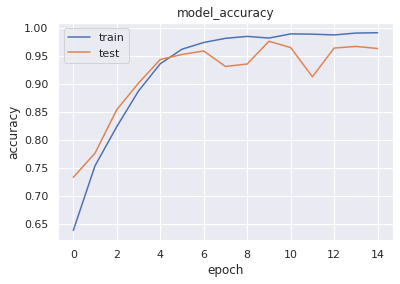

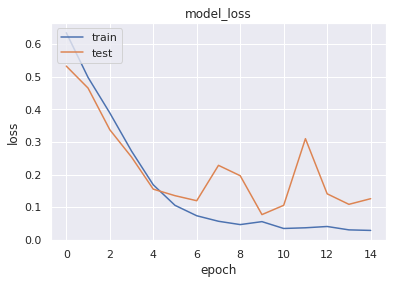

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3083
           1       0.95      0.99      0.97      3104

    accuracy                           0.97      6187
   macro avg       0.97      0.97      0.97      6187
weighted avg       0.97      0.97      0.97      6187



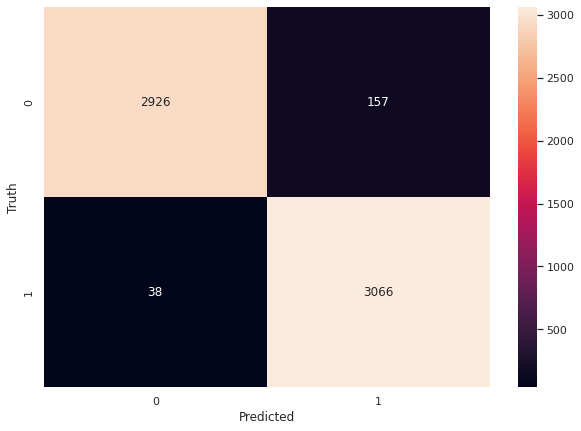

In [20]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

y_pred=model.predict(x_test)
y_result=[]
for pred in y_pred:
    pred = 1 if pred > 0.7 else 0
    y_result.append(pred)
print(y_result[:10])
y_actual=[]
for pred in y_test:
    pred = 1 if pred > 0.7 else 0
    y_actual.append(pred)
print(y_actual[:10])

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual,y_result))

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_actual,predictions=y_result)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
anger_json=model.to_json()
with open("anger_json", "w") as json_file:
  json_file.write(surprise_json)

#保存模型
model.save_weights("./H5/anger_model.h5")
